# Regression per Group 2

###  Mortality from heart failure

Overall summary:

- Group 0: High CH4, Fluorinated GHG, and Ozone level, such as GA and IN


    White and Black are the top 2 significant contributers to the mortality from heart failure.

- Group 1: High Ozone level but low other pollutant emissions, such as WA and MA. The most common group


    White, Asian or Pacific Islander, Hispanic, and Ozone are the top 4 influncial contributers to the mortality from heart failure.


- Group 2: High CO2, CH4, N2O, and low regulation or incentives, such as FL and TX


    White and Black are the top 2 significant contributers to the mortality from heart failure.


- Group 3: High regulation and incentives, such as CA


    White, Asian or Pacific Islander, and Hispanic are the top 3 significant contributers to the mortality from heart failure.

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

## Prepare data

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
data = pd.read_csv('~/Desktop/finaldata_clusters_regions_Added.csv').drop(columns = ['Unnamed: 0'])

In [4]:
data['Total Sq. Mi.']=data['Total Sq. Mi.'].str.replace(',','')
data['Total Sq. Mi.'] = data['Total Sq. Mi.'].astype('int64')

In [5]:
data['CO2_PER_POP'] = data['CO2'] / data['Population']
data['CO2_PER_SQUARE'] = data['CO2'] / data['Total Sq. Mi.']
data['CH4_PER_POP'] = data['CH4'] / data['Population']
data['CH4_PER_SQUARE'] = data['CH4'] / data['Total Sq. Mi.']
data['N2O_PER_POP'] = data['N2O'] / data['Population']
data['N2O_PER_SQUARE'] = data['N2O'] / data['Total Sq. Mi.']
data['Fluorinated GHG_PER_POP'] = data['Fluorinated GHG'] / data['Population']
data['Fluorinated GHG_PER_SQUARE'] = data['Fluorinated GHG'] / data['Total Sq. Mi.']

In [6]:
data.drop(['STATE', 'Year','CO2','CH4','N2O','Fluorinated GHG_PER_POP','Population','Total Sq. Mi.','Total Sq. Km.','REGION'], axis=1, inplace=True)

In [7]:
data = data[~data['StratificationCategory1'].isnull()]
cols = data.columns.tolist()
cols = cols[7:] + cols[:7]
data = data[cols]

In [8]:
data.head()

,DataValue,StratificationCategory1,Stratification1,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone,Question
0,234.8,Gender,Female,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Mortality from diseases of the heart
1,14.9,Gender,Female,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
2,8.6,Gender,Male,South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
3,8.9,Race/Ethnicity,"White, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate
4,21.8,Race/Ethnicity,"Black, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.38615,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215,Asthma mortality rate


### 2. Mortality from heart failure

In [9]:
data_q2 = data[data['Question']=='Mortality from heart failure']

In [10]:
data_q2_1 = data_q2[data_q2['StratificationCategory1']=='Race/Ethnicity']
data_q2_1.drop(['Question','StratificationCategory1'], axis=1, inplace=True)
data_q2_1 = data_q2_1[~data_q2_1['DataValue'].isnull()]

//anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [11]:
data_q2_1.head()

,DataValue,Stratification1,Region_Name,CO2_PER_POP,CO2_PER_SQUARE,CH4_PER_POP,CH4_PER_SQUARE,N2O_PER_POP,N2O_PER_SQUARE,Fluorinated GHG_PER_SQUARE,cluster,Fluorinated GHG,Laws and Regulations,State Incentives,Utility/Private Incentives,Ozone
31,138.8,"White, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215
36,90.7,"Black, non-Hispanic",South Region,17.472089,1605.081667,0.145715,13.386150,0.125172,11.499008,5.044582,1,264437,3,7,4,0.044215
116,90.6,"Black, non-Hispanic",South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,1,274194,3,7,4,0.039733
132,146.2,"White, non-Hispanic",South Region,17.245662,1589.048932,0.123060,11.338955,0.093460,8.611599,5.230713,1,274194,3,7,4,0.039733
182,142.4,"White, non-Hispanic",South Region,17.523932,1618.606543,0.130945,12.094792,0.108513,10.022873,5.955761,1,312201,3,7,4,0.040936


In [12]:
data_q2_1['cluster'].unique()

array([1, 3, 2, 0])

In [13]:
data_q2_1.rename(columns={'Stratification1':'Race'}, inplace=True)
data_q2_1 = pd.get_dummies(data_q2_1, columns = ['Race','Region_Name'], drop_first = True)

In [14]:
group_0 = data_q2_1[data_q2_1['cluster']==0]
group_1 = data_q2_1[data_q2_1['cluster']==1]
group_2 = data_q2_1[data_q2_1['cluster']==2]
group_3 = data_q2_1[data_q2_1['cluster']==3]

In [15]:
group_0.drop(['cluster'], axis=1, inplace=True)
group_1.drop(['cluster'], axis=1, inplace=True)
group_2.drop(['cluster'], axis=1, inplace=True)
group_3.drop(['cluster'], axis=1, inplace=True)

### Group 0

Group 0:

High CH4, Fluorinated GHG, and Ozone level, such as GA and IN

In [16]:
X = group_0.values[:,1:].copy()
y = group_0.DataValue.values

In [17]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.976


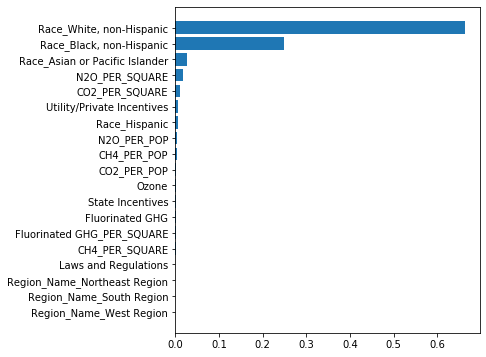

In [18]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_0.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 1

Segment 1 (yellow):

High Ozone level but low other pollutant emissions, such as WA and MA. The most common group

In [19]:
X = group_1.values[:,1:].copy()
y = group_1.DataValue.values

In [20]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.975
Accuracy on test set: 0.955


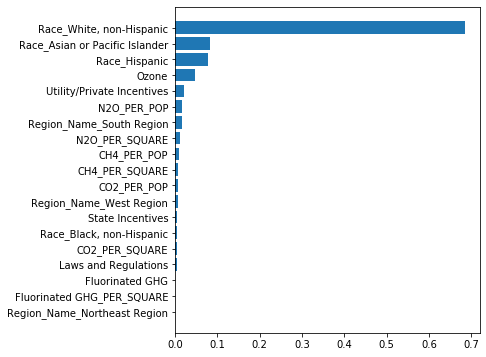

In [21]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_1.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 2

Segment 2:

High CO2, CH4, N2O, and low regulation or incentives, such as FL and TX

In [22]:
X = group_2.values[:,1:].copy()
y = group_2.DataValue.values

In [23]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 0.998
Accuracy on test set: 0.906


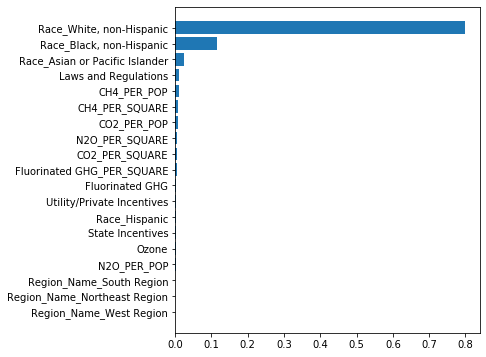

In [24]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_2.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()

### Group 3

Segment 3:

High regulation and incentives, such as CA.

In [25]:
X = group_3.values[:,1:].copy()
y = group_3.DataValue.values

In [26]:
from sklearn import ensemble
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}

model = ensemble.GradientBoostingRegressor(**params)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(model.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.832


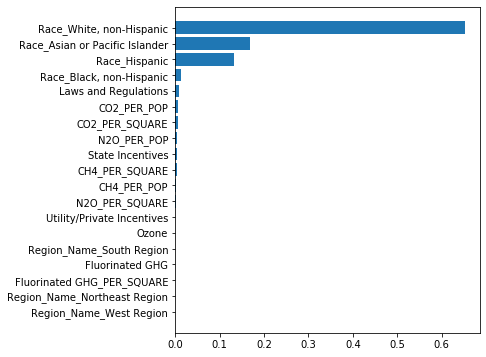

In [27]:
feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(group_3.iloc[:,1:].columns)[sorted_idx])
#plt.title('Feature Importance (MDI)')
plt.show()